# **Insurance Cost Prediction**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
import warnings  as ws
ws.filterwarnings("ignore")

from sklearn.linear_model import LinearRegression,Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics
from sklearn.ensemble import GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, BayesianRidge, SGDRegressor, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

##**Downloading the Data**

In [3]:
###

Downloading...
From: https://drive.google.com/uc?id=1jCJWWSWgPHtgLNQJETpzZ1Bi25AhHP3s
To: /content/insurance.csv
100% 30.8k/30.8k [00:00<00:00, 44.7MB/s]


In [4]:
df = pd.read_csv('insurance.csv')
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [6]:
print('The Number of rows in the given dataset',df.shape[0])
print('The Number of columns in the given dataset',df.shape[1])

The Number of rows in the given dataset 986
The Number of columns in the given dataset 11


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,986.0,41.745436,13.963371,18.0,30.0,42.0,53.0,66.0
Diabetes,986.0,0.419878,0.493789,0.0,0.0,0.0,1.0,1.0
BloodPressureProblems,986.0,0.468560,0.499264,0.0,0.0,0.0,1.0,1.0
AnyTransplants,986.0,0.055781,0.229615,0.0,0.0,0.0,0.0,1.0
AnyChronicDiseases,986.0,0.180527,0.384821,0.0,0.0,0.0,0.0,1.0
Height,986.0,168.182556,10.098155,145.0,161.0,168.0,176.0,188.0
Weight,986.0,76.950304,14.265096,51.0,67.0,75.0,87.0,132.0
KnownAllergies,986.0,0.215010,0.411038,0.0,0.0,0.0,0.0,1.0
HistoryOfCancerInFamily,986.0,0.117647,0.322353,0.0,0.0,0.0,0.0,1.0
NumberOfMajorSurgeries,986.0,0.667343,0.749205,0.0,0.0,1.0,1.0,3.0


In [8]:
df.isnull().sum()

,0
Age,0
Diabetes,0
BloodPressureProblems,0
AnyTransplants,0
AnyChronicDiseases,0
Height,0
Weight,0
KnownAllergies,0
HistoryOfCancerInFamily,0
NumberOfMajorSurgeries,0


In [9]:
df.duplicated().sum()

0

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
cols = df.columns
cols

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice'],
      dtype='object')

##**EDA of the Data**

In [12]:
pr_lab=['Low','Basic','Average','High','SuperHigh']
df['PremiumLabel']=pr_bins=pd.cut(df['PremiumPrice'],bins=5,labels=pr_lab,precision=0)

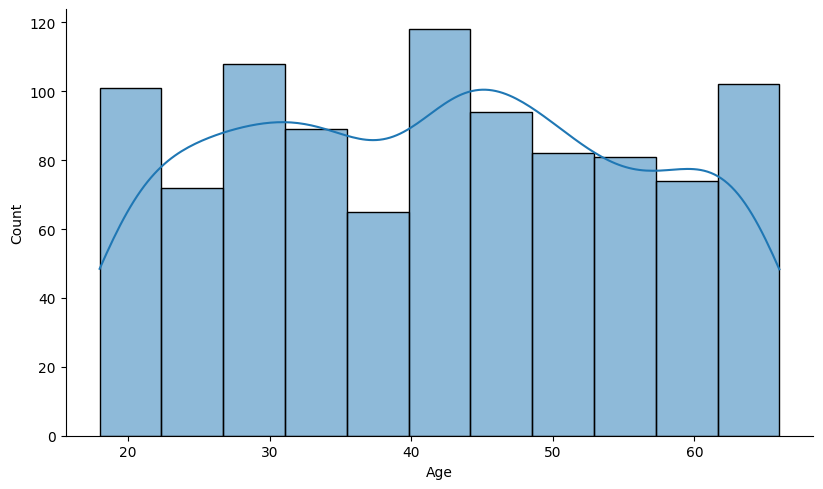

In [13]:
sns.displot(x='Age',data=df,aspect=10/6,kde=True)

Text(0.5, 1.0, 'Insurance Premium Price by Age')

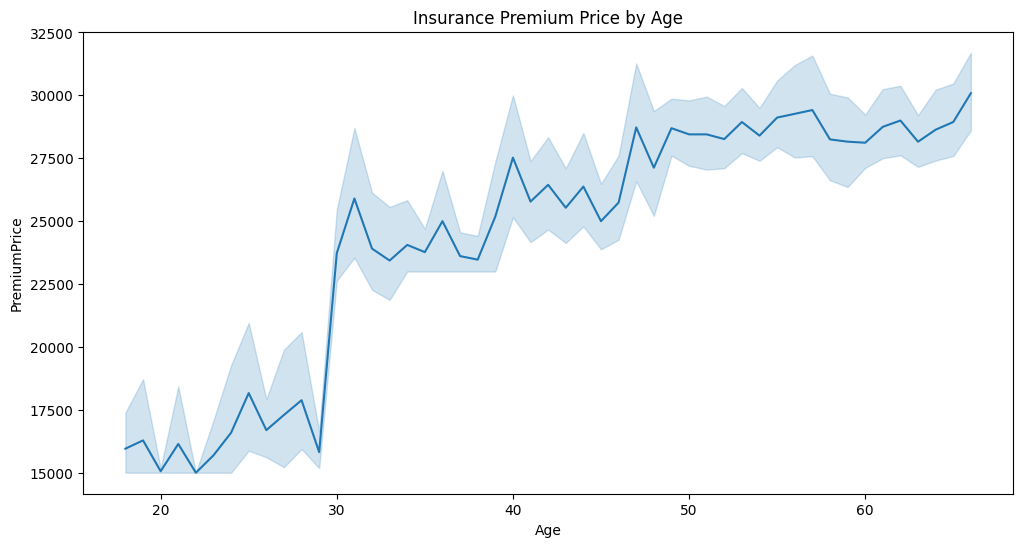

In [14]:
fig,ax=plt.subplots(figsize=(12,6))
sns.lineplot(x=df.Age,y=df.PremiumPrice).set_title('Insurance Premium Price by Age')

Text(0.5, 1.0, 'Distribution of the Insurance Premium Price')

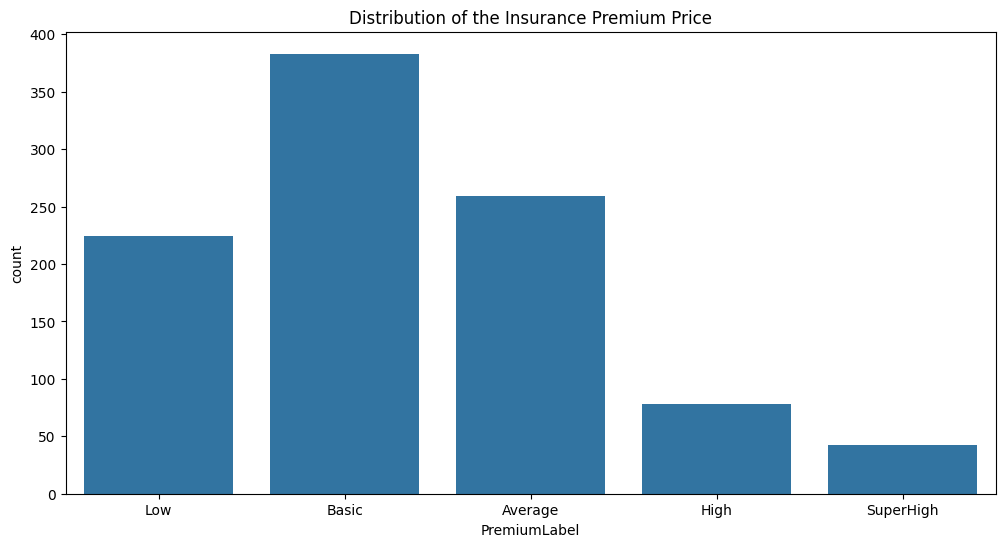

In [15]:
fig,ax=plt.subplots(figsize=(12,6))
sns.countplot(x='PremiumLabel', data=df,ax=ax).set_title('Distribution of the Insurance Premium Price')

In [16]:
df.groupby(['PremiumLabel','NumberOfMajorSurgeries'])['NumberOfMajorSurgeries'].count()

PremiumLabel  NumberOfMajorSurgeries
Low           0                         142
              1                          82
              2                           0
              3                           0
Basic         0                         226
              1                         156
              2                           1
              3                           0
Average       0                          67
              1                          59
              2                         117
              3                          16
High          0                          22
              1                          56
              2                           0
              3                           0
SuperHigh     0                          22
              1                          19
              2                           1
              3                           0
Name: NumberOfMajorSurgeries, dtype: int64

In [17]:
cols

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice'],
      dtype='object')

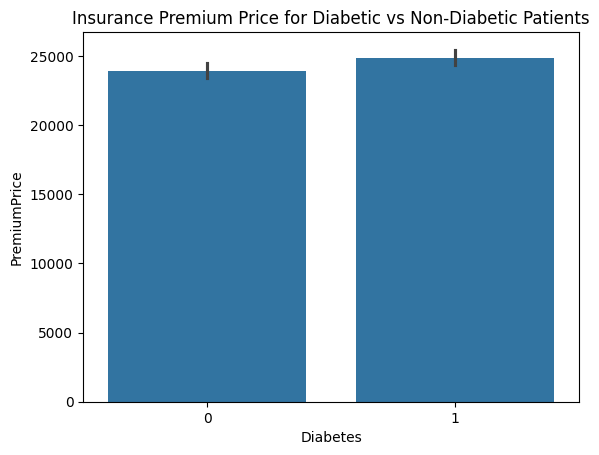

In [18]:
plot = sns.barplot(data=df, x="Diabetes", y= "PremiumPrice" ).set_title('Insurance Premium Price for Diabetic vs Non-Diabetic Patients')

Text(0.5, 0.98, 'Density plot for Diabetic vs Non-Diabetic Patients')

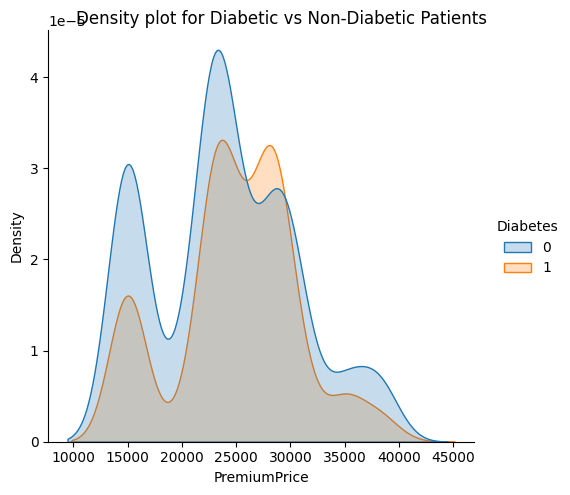

In [19]:
plot= sns.displot(df, x="PremiumPrice", hue="Diabetes", kind="kde", fill=True, )
plot.fig.suptitle('Density plot for Diabetic vs Non-Diabetic Patients',
                  fontsize=12)

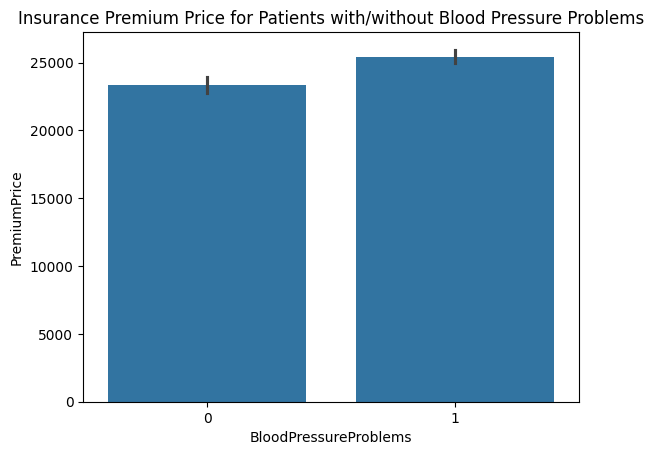

In [20]:
plot = sns.barplot(data=df, x="BloodPressureProblems", y= "PremiumPrice" ).set_title('Insurance Premium Price for Patients with/without Blood Pressure Problems')

Text(0.5, 0.98, 'Density plot for Patients with/without Blood Pressure Problems')

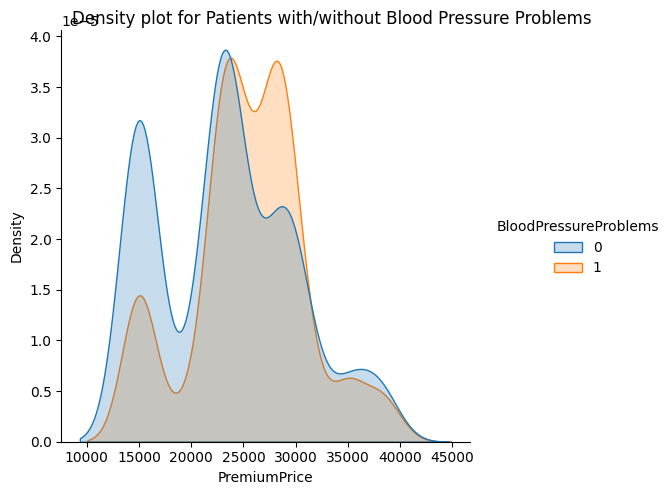

In [21]:
plot = sns.displot(df, x="PremiumPrice", hue="BloodPressureProblems", kind="kde", fill=True, )
plot.fig.suptitle('Density plot for Patients with/without Blood Pressure Problems',
                  fontsize=12)

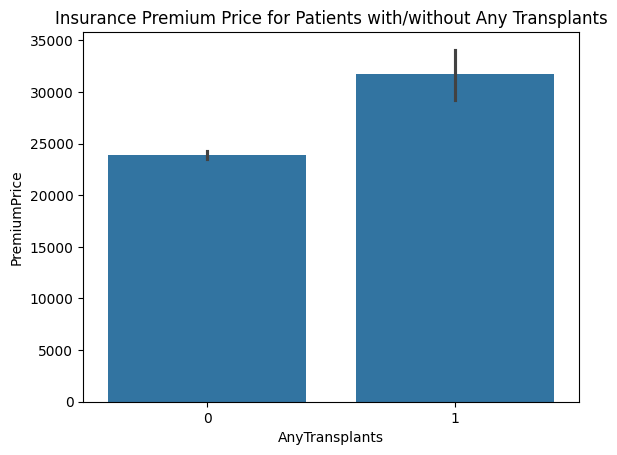

In [22]:
plot = sns.barplot(data=df, x="AnyTransplants", y= "PremiumPrice" ).set_title('Insurance Premium Price for Patients with/without Any Transplants')

Text(0.5, 0.98, 'Density plot for Patients with/without Any Transplants')

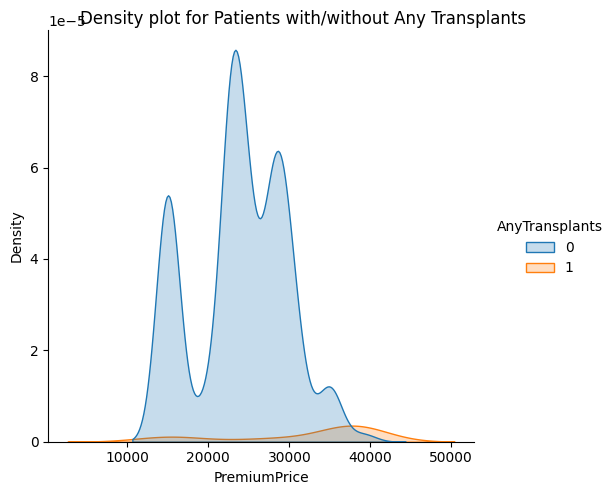

In [23]:
plot= sns.displot(df, x="PremiumPrice", hue="AnyTransplants", kind="kde", fill=True, )
plot.fig.suptitle('Density plot for Patients with/without Any Transplants',
                  fontsize=12)

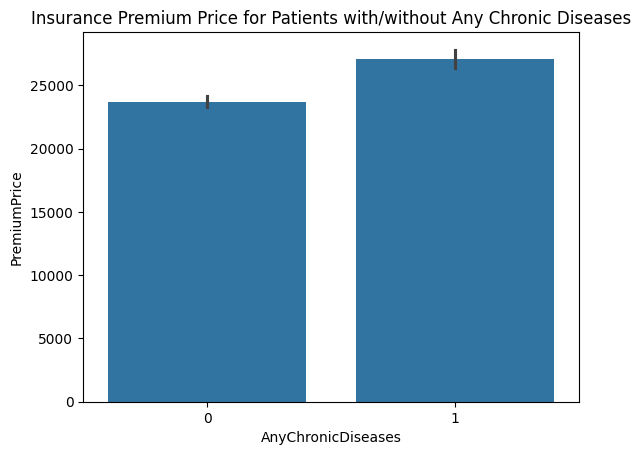

In [24]:
plot = sns.barplot(data=df, x="AnyChronicDiseases", y= "PremiumPrice" ).set_title('Insurance Premium Price for Patients with/without Any Chronic Diseases')

Text(0.5, 0.98, 'Density plot for Patients with/without Any Chronic Diseases')

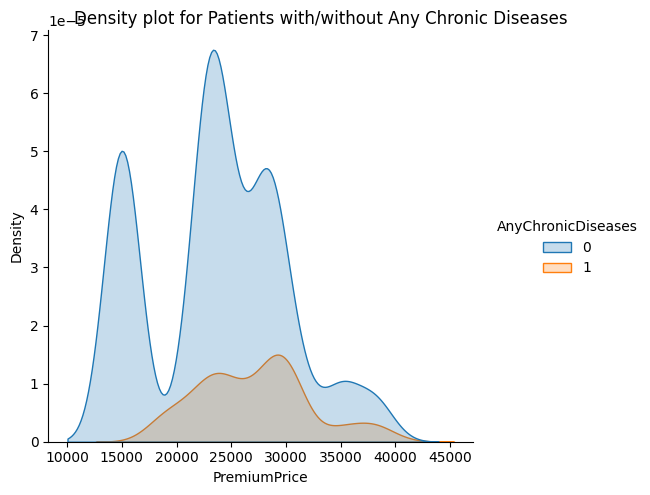

In [25]:
plot= sns.displot(df, x="PremiumPrice", hue="AnyChronicDiseases", kind="kde", fill=True, )
plot.fig.suptitle('Density plot for Patients with/without Any Chronic Diseases',
                  fontsize=12)

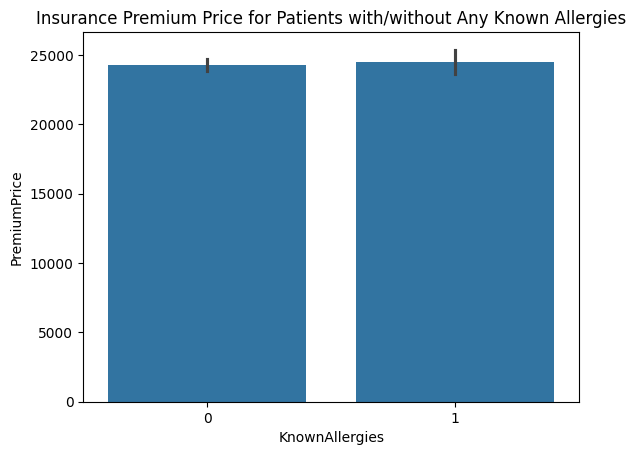

In [26]:
plot = sns.barplot(data=df, x="KnownAllergies", y= "PremiumPrice" ).set_title('Insurance Premium Price for Patients with/without Any Known Allergies')

Text(0.5, 0.98, 'Density plot for Patients with/without Any Known Allergies')

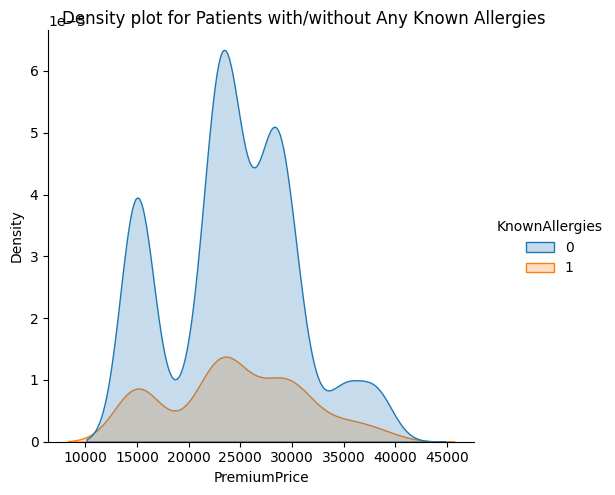

In [27]:
plot= sns.displot(df, x="PremiumPrice", hue="KnownAllergies", kind="kde", fill=True, )
plot.fig.suptitle('Density plot for Patients with/without Any Known Allergies',
                  fontsize=12)

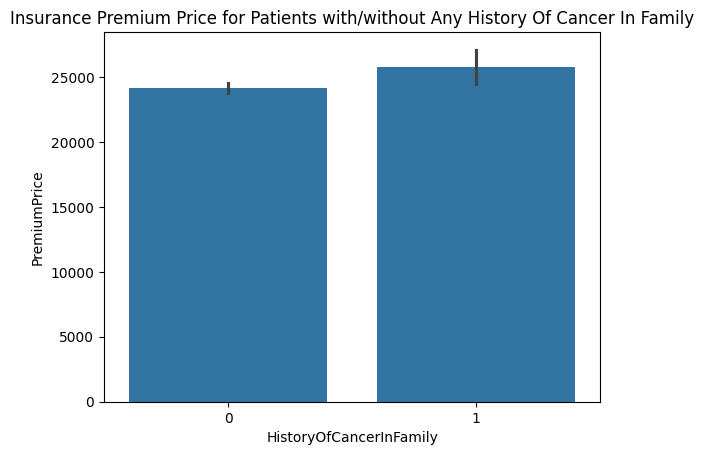

In [28]:
plot = sns.barplot(data=df, x="HistoryOfCancerInFamily", y= "PremiumPrice" ).set_title('Insurance Premium Price for Patients with/without Any History Of Cancer In Family')

Text(0.5, 0.98, 'Density plot for Patients with/without Any History Of Cancer In Family')

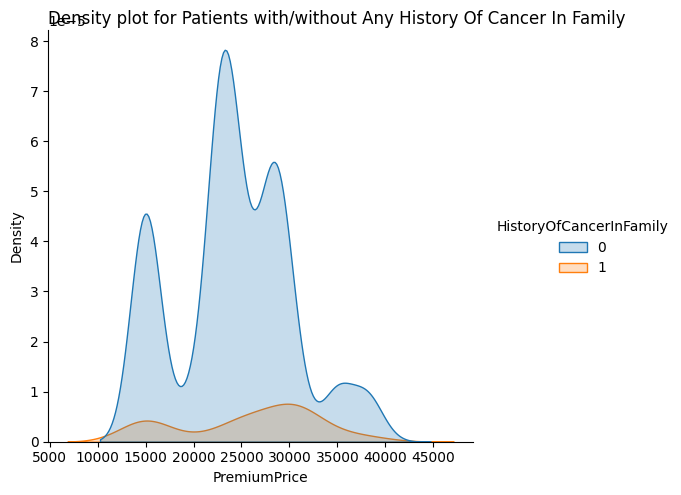

In [29]:
plot= sns.displot(df, x="PremiumPrice", hue="HistoryOfCancerInFamily", kind="kde", fill=True, )
plot.fig.suptitle('Density plot for Patients with/without Any History Of Cancer In Family',
                  fontsize=12)

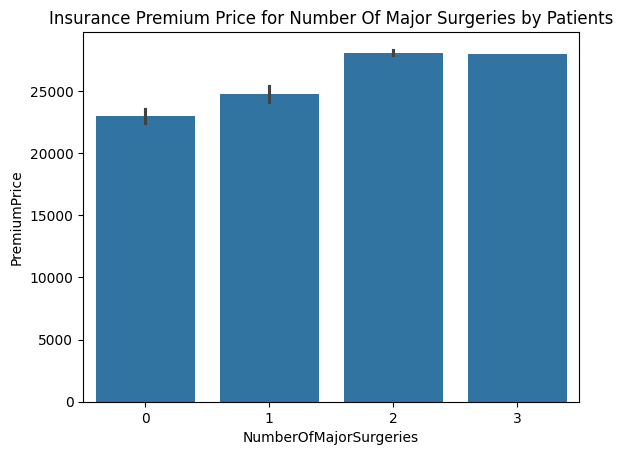

In [30]:
plot = sns.barplot(data=df, x="NumberOfMajorSurgeries", y= "PremiumPrice" ).set_title('Insurance Premium Price for Number Of Major Surgeries by Patients')

Text(0.5, 0.98, 'Density plot for Number Of Major Surgeries by Patients')

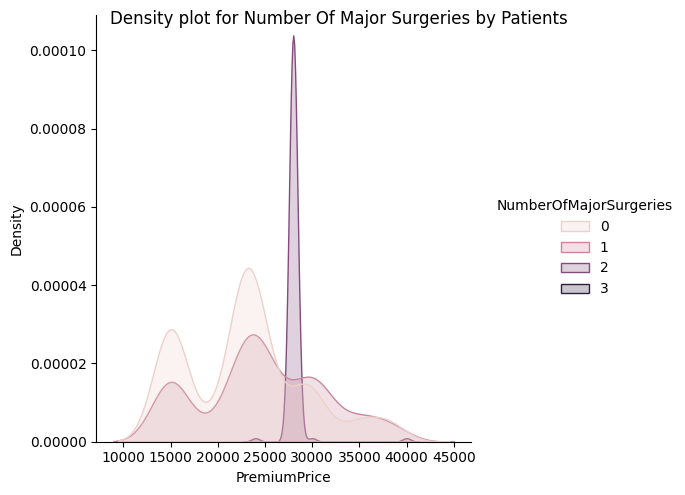

In [31]:
plot= sns.displot(df, x="PremiumPrice", hue="NumberOfMajorSurgeries", kind="kde", fill=True, )
plot.fig.suptitle('Density plot for Number Of Major Surgeries by Patients',
                  fontsize=12)

In [32]:
# Calculating BMI
w = df['Weight'];
h = df['Height'];

#bmi = 10000*(weight/(height*height));

df['BMI'] = 10000*(w/(h*h))

df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,PremiumLabel,BMI
0,45,0,0,0,0,155,57,0,0,0,25000,Basic,23.725286
1,60,1,0,0,0,180,73,0,0,0,29000,Average,22.530864
2,36,1,1,0,0,158,59,0,0,1,23000,Basic,23.634033
3,52,1,1,0,1,183,93,0,0,2,28000,Average,27.770313
4,38,0,0,0,1,166,88,0,0,1,23000,Basic,31.934969


In [33]:
df['BMI_Status'] = np.select(
    [df['BMI'] < 18.499999,
     df['BMI'] >= 30,
     df['BMI'].between(18.5, 24.999999),
     df['BMI'].between(25, 29.9999999)],
    ['Underweight', 'Obesse', 'Normal', 'Overweight']
)

In [34]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,PremiumLabel,BMI,BMI_Status
0,45,0,0,0,0,155,57,0,0,0,25000,Basic,23.725286,Normal
1,60,1,0,0,0,180,73,0,0,0,29000,Average,22.530864,Normal
2,36,1,1,0,0,158,59,0,0,1,23000,Basic,23.634033,Normal
3,52,1,1,0,1,183,93,0,0,2,28000,Average,27.770313,Overweight
4,38,0,0,0,1,166,88,0,0,1,23000,Basic,31.934969,Obesse


In [35]:
df.groupby(['PremiumLabel','BMI_Status'])['BMI_Status'].count()

PremiumLabel  BMI_Status 
Low           Normal          71
              Obesse          70
              Overweight      74
              Underweight      9
Basic         Normal         151
              Obesse          88
              Overweight     120
              Underweight     24
Average       Normal          74
              Obesse          80
              Overweight     100
              Underweight      5
High          Normal          13
              Obesse          49
              Overweight      15
              Underweight      1
SuperHigh     Normal          10
              Obesse          16
              Overweight      16
              Underweight      0
Name: BMI_Status, dtype: int64

<Axes: xlabel='PremiumLabel', ylabel='count'>

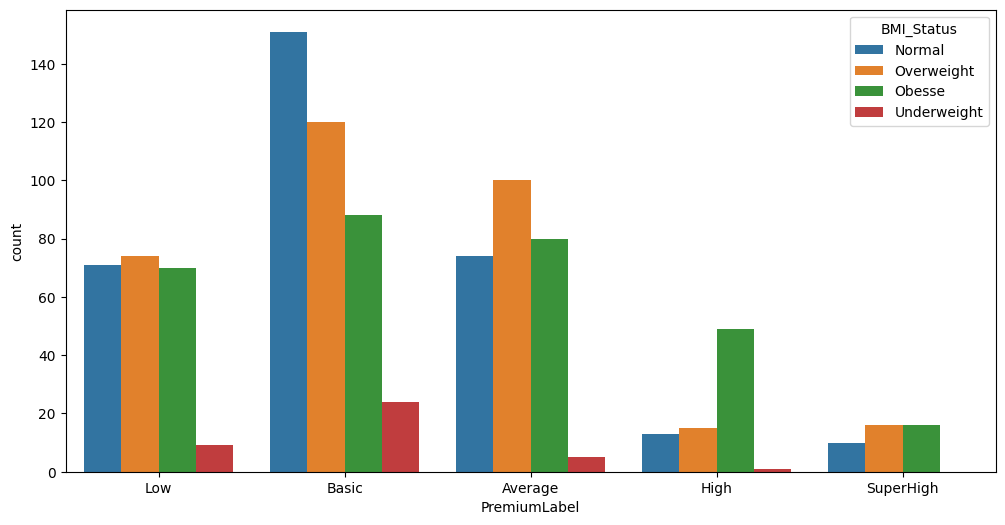

In [36]:
fig,ax=plt.subplots(figsize=(12,6))
sns.countplot(x='PremiumLabel',hue='BMI_Status', data=df,ax=ax)

Text(0.5, 1.0, 'Insurance Premium Price for Various BMI Status')

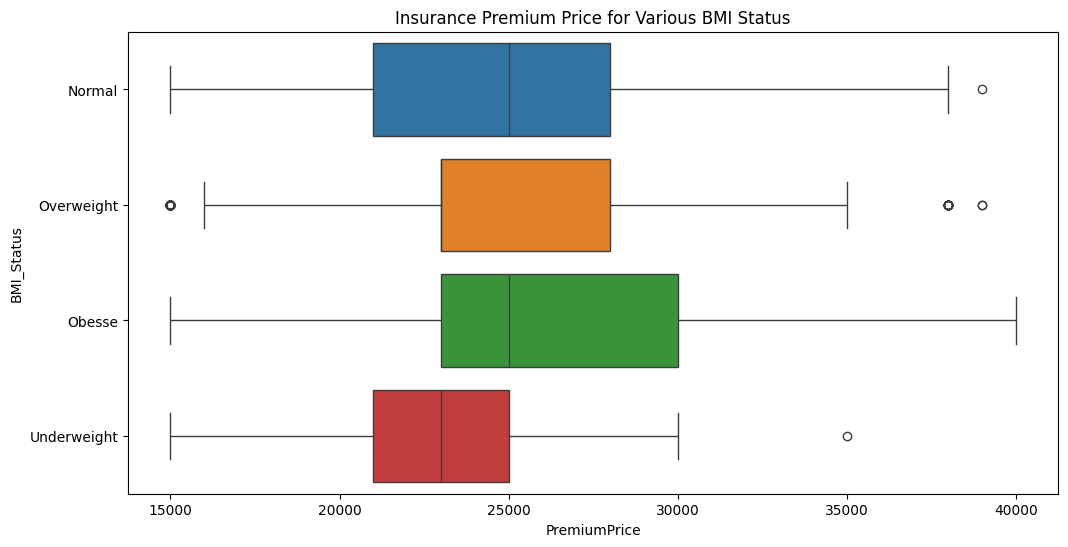

In [37]:
fig,ax=plt.subplots(figsize=(12,6))
sns.boxplot(data=df, x="PremiumPrice", y="BMI_Status", hue="BMI_Status", dodge=False).set_title('Insurance Premium Price for Various BMI Status')

<Axes: >

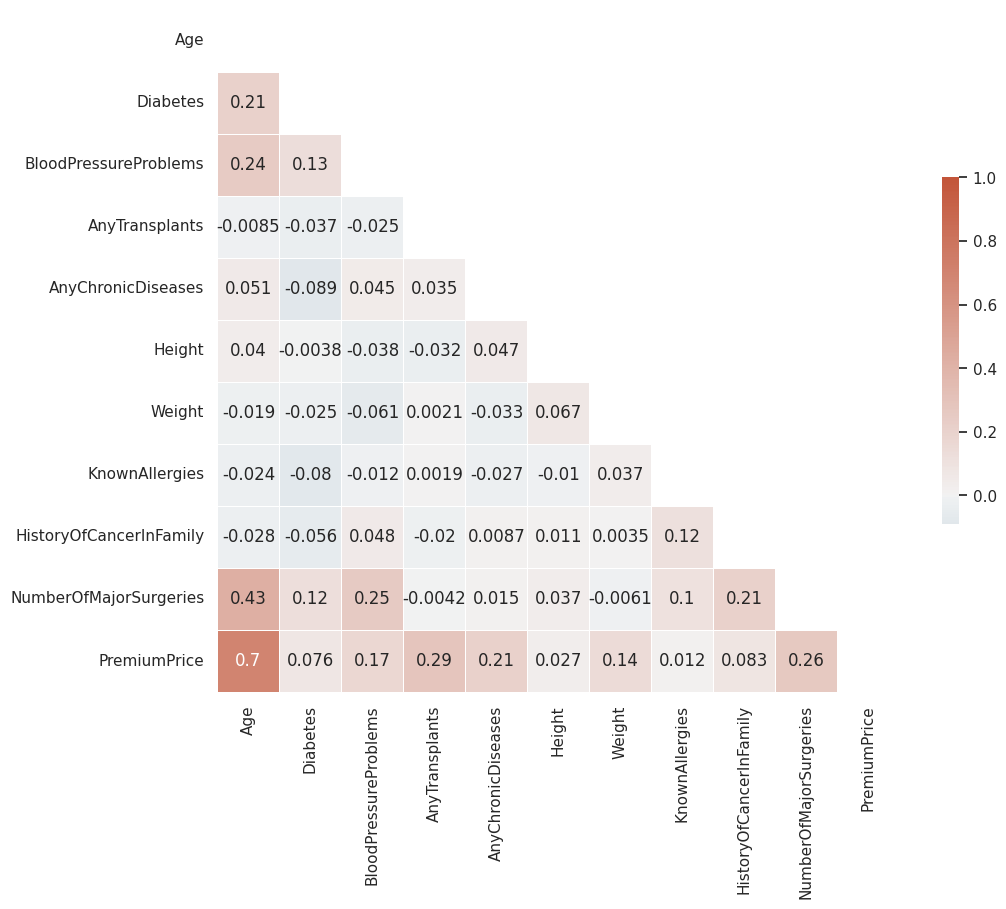

In [38]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Generate a large random dataset
rs = df
d = pd.DataFrame(data=rs,
                 columns=cols)

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [39]:
df=pd.get_dummies(data=df,columns=['BMI_Status'])
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,PremiumLabel,BMI,BMI_Status_Normal,BMI_Status_Obesse,BMI_Status_Overweight,BMI_Status_Underweight
0,45,0,0,0,0,155,57,0,0,0,25000,Basic,23.725286,True,False,False,False
1,60,1,0,0,0,180,73,0,0,0,29000,Average,22.530864,True,False,False,False
2,36,1,1,0,0,158,59,0,0,1,23000,Basic,23.634033,True,False,False,False
3,52,1,1,0,1,183,93,0,0,2,28000,Average,27.770313,False,False,True,False
4,38,0,0,0,1,166,88,0,0,1,23000,Basic,31.934969,False,True,False,False


In [40]:
print(df.shape)
df.columns

(986, 17)


Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice',
       'PremiumLabel', 'BMI', 'BMI_Status_Normal', 'BMI_Status_Obesse',
       'BMI_Status_Overweight', 'BMI_Status_Underweight'],
      dtype='object')

##**Building the ML Model**

In [41]:
x=df.drop(['PremiumPrice', 'PremiumLabel', 'Height', 'Weight', 'BMI_Status_Normal', 'BMI_Status_Obesse', 'BMI_Status_Overweight',
       'BMI_Status_Underweight'], axis=1)
y=df['PremiumPrice']

In [42]:
x.columns

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'KnownAllergies', 'HistoryOfCancerInFamily',
       'NumberOfMajorSurgeries', 'BMI'],
      dtype='object')

In [43]:
# Data Normalizing
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xsc=sc.fit_transform(x)

In [44]:
xsc=pd.DataFrame(xsc,columns=x.columns)

In [45]:
from sklearn.feature_selection import mutual_info_regression
mi_scores = mutual_info_regression(xsc,y)
mi_scores = pd.Series(mi_scores, name="MI Scores",index=xsc.columns)
mi_scores = mi_scores.sort_values(ascending=False)
(mi_scores*100).head(15).index

Index(['Age', 'NumberOfMajorSurgeries', 'AnyChronicDiseases', 'AnyTransplants',
       'HistoryOfCancerInFamily', 'BMI', 'Diabetes', 'BloodPressureProblems',
       'KnownAllergies'],
      dtype='object')

In [46]:
fea=list((mi_scores*100).head(15).index)
xsc=xsc[fea]
xsc

,Age,NumberOfMajorSurgeries,AnyChronicDiseases,AnyTransplants,HistoryOfCancerInFamily,BMI,Diabetes,BloodPressureProblems,KnownAllergies
0,0.233197,-0.891187,-0.469358,-0.243056,-0.365148,-0.635742,-0.850750,-0.938978,-0.523356
1,1.307981,-0.891187,-0.469358,-0.243056,-0.365148,-0.839024,1.175433,-0.938978,-0.523356
2,-0.411674,0.444239,-0.469358,-0.243056,-0.365148,-0.651273,1.175433,1.064988,-0.523356
3,0.734763,1.779665,2.130569,-0.243056,-0.365148,0.052692,1.175433,1.064988,-0.523356
4,-0.268369,0.444239,2.130569,-0.243056,-0.365148,0.761487,-0.850750,-0.938978,-0.523356
...,...,...,...,...,...,...,...,...,...
981,-1.701415,-0.891187,-0.469358,-0.243056,-0.365148,-0.681136,-0.850750,-0.938978,-0.523356
982,1.594590,3.115090,-0.469358,-0.243056,-0.365148,0.415665,1.175433,1.064988,-0.523356
983,1.021372,0.444239,-0.469358,-0.243056,-0.365148,0.356016,-0.850750,1.064988,-0.523356
984,0.376502,0.444239,-0.469358,-0.243056,-0.365148,0.303181,1.175433,1.064988,1.910744


In [47]:
y.shape

(986,)

### **LR Model**

In [48]:
l1=[]
l2=[]
l3=[]
cvs=0
for i in range(40,50):
    xtrain,xtest,ytrain,ytest=train_test_split(xsc, y, random_state=i, test_size=0.25)
    lrmodel=LinearRegression()
    lrmodel.fit(xtrain,ytrain)
    l1.append(lrmodel.score(xtrain,ytrain))
    l2.append(lrmodel.score(xtest,ytest))
    cvs=(cross_val_score(lrmodel,xsc,y,cv=5,)).mean()
    l3.append(cvs)
    df1=pd.DataFrame({'train acc':l1,'test acc':l2,'cvs':l3})
df1

,train acc,test acc,cvs
0,0.637474,0.627533,0.625563
1,0.611197,0.708565,0.625563
2,0.611934,0.684631,0.625563
3,0.618526,0.678363,0.625563
4,0.663599,0.538531,0.625563
5,0.612477,0.693333,0.625563
6,0.623898,0.664788,0.625563
7,0.624509,0.663170,0.625563
8,0.619543,0.675309,0.625563
9,0.674919,0.501717,0.625563


In [49]:
xtrain,xtest,ytrain,ytest=train_test_split(xsc,y,test_size=0.25,random_state=41)
lrmodel=LinearRegression()
lrmodel.fit(xtrain,ytrain)
print(lrmodel.score(xtrain,ytrain))
print(lrmodel.score(xtest,ytest))
print(cross_val_score(lrmodel,xsc,y,cv=5,).mean())

0.6111971888559355
0.7085652213125866
0.6255626958404497


In [50]:
acc_lr_Train = lrmodel.score(xtrain,ytrain)
print('R^2 Train:', acc_lr_Train)

acc_lr_Test = lrmodel.score(xtest,ytest)
print('R^2 Test:', acc_lr_Test)

acc_lr_CV = cross_val_score(lrmodel,xsc,y,cv=5,).mean()
print('R^2 CV:', acc_lr_CV)

R^2 Train: 0.6111971888559355
R^2 Test: 0.7085652213125866
R^2 CV: 0.6255626958404497


### **SVM Model**

In [51]:
import time
import psutil

# Record the start time
start_time = time.time()
# Function to get memory usage
def get_memory_usage():
    process = psutil.Process()
    memory_info = process.memory_info()
    return memory_info.rss / (1024 * 1024)  # Convert to megabytes

# Record memory usage before running your code
start_memory = get_memory_usage()




from sklearn.metrics import r2_score
svrmodel=SVR()
svrmodel.fit(xtrain,ytrain)
ypredtrain1=svrmodel.predict(xtrain)
ypredtest1=svrmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain1))
print(r2_score(ytest,ypredtest1))
print(cross_val_score(svrmodel,xsc,y,cv=5,).mean())



acc_SVM_Train = r2_score(ytrain,ypredtrain1)
print('R^2 Train:', acc_SVM_Train)

acc_SVM_Test = r2_score(ytest,ypredtest1)
print('R^2 Test:', acc_SVM_Test)

acc_SVM_CV = cross_val_score(svrmodel,xsc,y,cv=5,).mean()
print('R^2 CV:', acc_SVM_CV)



# other metrics

MAE_SVM_Test= metrics.mean_absolute_error(ytest,ypredtest1)
print('MAE:',MAE_SVM_Test)

MSE_SVM_Test = metrics.mean_squared_error(ytest,ypredtest1)
print('MSE:',MSE_SVM_Test)

RMSE_SVM_Test = np.sqrt(metrics.mean_squared_error(ytest,ypredtest1))
print('RMSE:', RMSE_SVM_Test)

MAPE_SVM_Test= (metrics.mean_absolute_percentage_error(ytest,ypredtest1))
print('MAPE:',MAPE_SVM_Test)



# Record the end time
end_time = time.time()
# Record memory usage after running your code
end_memory = get_memory_usage()

# Calculate and print the elapsed time
RF_elapsed_time = end_time - start_time

# Calculate and print memory usage
RF_memory_used = end_memory - start_memory


print(f"Elapsed Time: {RF_elapsed_time} seconds")

print(f"Memory Used: {RF_memory_used} MB")

-0.03541346056671246
-0.028498546246157774
-0.03333576127734137
R^2 Train: -0.03541346056671246
R^2 Test: -0.028498546246157774
R^2 CV: -0.03333576127734137
MAE: 4742.603385803891
MSE: 37853547.70145163
RMSE: 6152.5236855660805
MAPE: 0.21276816737710638
Elapsed Time: 1.0006823539733887 seconds
Memory Used: 0.0 MB


### **RF Model**

In [52]:
import time
import psutil

# Record the start time
start_time = time.time()
# Function to get memory usage
def get_memory_usage():
    process = psutil.Process()
    memory_info = process.memory_info()
    return memory_info.rss / (1024 * 1024)  # Convert to megabytes

# Record memory usage before running your code
start_memory = get_memory_usage()


rfmodel0=RandomForestRegressor(random_state=41)
rfmodel0.fit(xtrain,ytrain)
ypredtrain2=rfmodel0.predict(xtrain)
ypredtest2=rfmodel0.predict(xtest)
print(r2_score(ytrain,ypredtrain2))
print(r2_score(ytest,ypredtest2))
print(cross_val_score(rfmodel0,xsc,y,cv=5,).mean())

from sklearn.model_selection import GridSearchCV
estimator=RandomForestRegressor(random_state=41)
param_grid={'n_estimators':[60, 220, 40]}
grid1=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid1.fit(xtrain,ytrain)
print(grid1.best_params_)

rfmodel=grid1
rfmodel.fit(xtrain,ytrain)
ypredtrain2=rfmodel.predict(xtrain)
ypredtest2=rfmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain2))
print(r2_score(ytest,ypredtest2))
print(cross_val_score(rfmodel,xsc,y,cv=5,).mean())



acc_RF_Train = (r2_score(ytrain,ypredtrain2))
print('R^2 Train:', acc_RF_Train)

acc_RF_Test = (r2_score(ytest,ypredtest2))
print('R^2 Test:', acc_RF_Test)

acc_RF_CV = cross_val_score(rfmodel,xsc,y,cv=5,).mean()
print('R^2 CV:', acc_RF_CV)


# other metrics

MAE_RF_Test= metrics.mean_absolute_error(ytest,ypredtest2)
print('MAE:',MAE_RF_Test)
MSE_RF_Test = metrics.mean_squared_error(ytest,ypredtest2)
print('MSE:',MSE_RF_Test)
RMSE_RF_Test = np.sqrt(metrics.mean_squared_error(ytest,ypredtest2))
print('RMSE:', RMSE_RF_Test)
MAPE_RF_Test= (metrics.mean_absolute_percentage_error(ytest,ypredtest2))
print('MAPE:',MAPE_RF_Test)




# Record the end time
end_time = time.time()
# Record memory usage after running your code
end_memory = get_memory_usage()

# Calculate and print the elapsed time
RF_elapsed_time = end_time - start_time

# Calculate and print memory usage
RF_memory_used = end_memory - start_memory


print(f"Elapsed Time: {RF_elapsed_time} seconds")

print(f"Memory Used: {RF_memory_used} MB")

0.9555041911092462
0.8437573879405865
0.7342771613420176
{'n_estimators': 220}
0.9580939423330935
0.8421244126362184
0.7347959475933485
R^2 Train: 0.9580939423330935
R^2 Test: 0.8421244126362184
R^2 CV: 0.7347959475933485
MAE: 1376.9966875230034
MSE: 5810558.604075351
RMSE: 2410.5100298640846
MAPE: 0.05809059178951656
Elapsed Time: 54.253811836242676 seconds
Memory Used: 0.0 MB


### **GBM Model**

In [53]:
import time
import psutil

# Record the start time
start_time = time.time()
# Function to get memory usage
def get_memory_usage():
    process = psutil.Process()
    memory_info = process.memory_info()
    return memory_info.rss / (1024 * 1024)  # Convert to megabytes

# Record memory usage before running your code
start_memory = get_memory_usage()



gbmodel0=GradientBoostingRegressor()
gbmodel0.fit(xtrain,ytrain)
ypredtrain3=gbmodel0.predict(xtrain)
ypredtest3=gbmodel0.predict(xtest)
print(r2_score(ytrain,ypredtrain3))
print(r2_score(ytest,ypredtest3))
print(cross_val_score(gbmodel0,xsc,y,cv=5,).mean())
from sklearn.model_selection import GridSearchCV
estimator=GradientBoostingRegressor()
param_grid={'n_estimators':[10,15,19,20,21,50,100],'learning_rate':[0.1,0.19,0.2,0.21,0.8,1]}
grid2=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid2.fit(xtrain,ytrain)
print(grid2.best_params_)

gbmodel=grid2
gbmodel.fit(xtrain,ytrain)
ypredtrain3=gbmodel.predict(xtrain)
ypredtest3=gbmodel.predict(xtest)



acc_GBM_Train = (r2_score(ytrain,ypredtrain3))
print('R^2 Train:', acc_GBM_Train)

acc_GBM_Test = (r2_score(ytest,ypredtest3))
print('R^2 Test:', acc_GBM_Test)

acc_GBM_CV = cross_val_score(gbmodel,xsc,y,cv=5,).mean()
print('R^2 CV:', acc_GBM_CV)


# other metrics

MAE_GBM_Test= metrics.mean_absolute_error(ytest,ypredtest3)
print('MAE:',MAE_GBM_Test)
MSE_GBM_Test = metrics.mean_squared_error(ytest,ypredtest3)
print('MSE:',MSE_GBM_Test)
RMSE_GBM_Test = np.sqrt(metrics.mean_squared_error(ytest,ypredtest3))
print('RMSE:', RMSE_GBM_Test)
MAPE_GBM_Test= (metrics.mean_absolute_percentage_error(ytest,ypredtest3))
print('MAPE:',MAPE_GBM_Test)





# Record the end time
end_time = time.time()
# Record memory usage after running your code
end_memory = get_memory_usage()

# Calculate and print the elapsed time
GBM_elapsed_time = end_time - start_time

# Calculate and print memory usage
GBM_memory_used = end_memory - start_memory


print(f"Elapsed Time: {GBM_elapsed_time} seconds")

print(f"Memory Used: {GBM_memory_used} MB")

0.8635682469956296
0.8416006132421695
0.7251613192115623
{'learning_rate': 0.19, 'n_estimators': 20}
R^2 Train: 0.7949199422986154
R^2 Test: 0.8450395028347657
R^2 CV: 0.7266667843774078
MAE: 1741.1987776705644
MSE: 5703269.67665052
RMSE: 2388.151937513717
MAPE: 0.07305477817880449
Elapsed Time: 59.40939450263977 seconds
Memory Used: 0.0 MB


### **XGB Model**

In [54]:
import time
import psutil
import xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import r2_score

# Record the start time
start_time = time.time()

# Function to get memory usage
def get_memory_usage():
    process = psutil.Process()
    memory_info = process.memory_info()
    return memory_info.rss / (1024 * 1024)  # Convert to megabytes

# Record memory usage before running your code
start_memory = get_memory_usage()

xgmodel0 = XGBRegressor()  # Use xgboost.XGBRegressor
xgmodel0.fit(xtrain, ytrain)
ypredtrain4 = xgmodel0.predict(xtrain)
ypredtest4 = xgmodel0.predict(xtest)
print(r2_score(ytrain, ypredtrain4))
print(r2_score(ytest, ypredtest4))
#print(cross_val_score(xgmodel0, xsc, y, cv=5).mean())

# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [5, 7, 10],
    'gamma': [0, 0.15, 0.3, 0.5, 1],
    'learning_rate': [0.1, 0.01, 0.05],
    'subsample': [0.6, 0.7, 0.75, 0.8, 0.85, 0.9]
}

# Instantiate GridSearchCV with XGBRegressor and the defined parameter grid
grid3 = GridSearchCV(estimator=XGBRegressor(), param_grid=param_grid, scoring="r2", cv=5)

# Fit the GridSearchCV object to the training data to find the best hyperparameters
grid3.fit(xtrain, ytrain)

# Print the best hyperparameters found by GridSearchCV
print(grid3.best_params_)

# Assign the best estimator from GridSearchCV to xgmodel
xgmodel = grid3.best_estimator_  # Assign the best estimator, not the GridSearchCV object

# Fit the best XGBoost model to the training data
xgmodel.fit(xtrain, ytrain)

# Make predictions on the training and testing data
ypredtrain4 = xgmodel.predict(xtrain)
ypredtest4 = xgmodel.predict(xtest)

# Calculate and print R^2 scores for training, testing, and cross-validation
acc_xgb_Train = r2_score(ytrain, ypredtrain4)
print('R^2 Train:', acc_xgb_Train)

acc_xgb_Test = r2_score(ytest, ypredtest4)
print('R^2 Test:', acc_xgb_Test)

acc_xgb_CV = cross_val_score(xgmodel, xsc, y, cv=5).mean()
print('R^2 CV:', acc_xgb_CV)

# Calculate and print other evaluation metrics (MAE, MSE, RMSE, MAPE)
MAE_xgb_Test = metrics.mean_absolute_error(ytest, ypredtest4)
print('MAE:', MAE_xgb_Test)
MSE_xgb_Test = metrics.mean_squared_error(ytest, ypredtest4)
print('MSE:', MSE_xgb_Test)
RMSE_xgb_Test = np.sqrt(metrics.mean_squared_error(ytest, ypredtest4))
print('RMSE:', RMSE_xgb_Test)
MAPE_xgb_Test = metrics.mean_absolute_percentage_error(ytest, ypredtest4)
print('MAPE:', MAPE_xgb_Test)

# Record the end time
end_time = time.time()

# Record memory usage after running your code
end_memory = get_memory_usage()

# Calculate and print the elapsed time
xgb_elapsed_time = end_time - start_time

# Calculate and print memory usage
xgb_memory_used = end_memory - start_memory

print(f"Elapsed Time: {xgb_elapsed_time} seconds")
print(f"Memory Used: {xgb_memory_used} MB")

0.998734912770186
0.7960473189823138


KeyboardInterrupt: 

In [55]:
import time
import psutil

# Record the start time
start_time = time.time()
# Function to get memory usage
def get_memory_usage():
    process = psutil.Process()
    memory_info = process.memory_info()
    return memory_info.rss / (1024 * 1024)  # Convert to megabytes

# Record memory usage before running your code
start_memory = get_memory_usage()



xgmodel0=XGBRegressor()
xgmodel0.fit(xtrain,ytrain)
ypredtrain4=xgmodel0.predict(xtrain)
ypredtest4=xgmodel0.predict(xtest)
print(r2_score(ytrain,ypredtrain4))
print(r2_score(ytest,ypredtest4))
print(cross_val_score(xgmodel0,xsc,y,cv=5,).mean())

from sklearn.model_selection import GridSearchCV

estimator=XGBRegressor()
param_grid={'n_estimators':[50,100,150,200],'max_depth':[5,7,10],'gamma':[0,0.15,0.3,0.5,1],
            'learning_rate': [0.1, 0.01, 0.05], 'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}
grid3=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid3.fit(xtrain,ytrain)

print(grid3.best_params_)

xgmodel=grid3
xgmodel.fit(xtrain,ytrain)
ypredtrain4=xgmodel.predict(xtrain)
ypredtest4=xgmodel.predict(xtest)



acc_xgb_Train = (r2_score(ytrain,ypredtrain4))
print('R^2 Train:', acc_xgb_Train)

acc_xgb_Test = (r2_score(ytest,ypredtest4))
print('R^2 Test:', acc_xgb_Test)

acc_xgb_CV = (cross_val_score(xgmodel,xsc,y,cv=5,).mean())
print('R^2 CV:', acc_xgb_CV)


# other metrics

MAE_xgb_Test= metrics.mean_absolute_error(ytest,ypredtest4)
print('MAE:',MAE_xgb_Test)
MSE_xgb_Test = metrics.mean_squared_error(ytest,ypredtest4)
print('MSE:',MSE_xgb_Test)
RMSE_xgb_Test = np.sqrt(metrics.mean_squared_error(ytest,ypredtest4))
print('RMSE:', RMSE_xgb_Test)
MAPE_xgb_Test= (metrics.mean_absolute_percentage_error(ytest,ypredtest4))
print('MAPE:',MAPE_xgb_Test)


# Record the end time
end_time = time.time()
# Record memory usage after running your code
end_memory = get_memory_usage()

# Calculate and print the elapsed time
xgb_elapsed_time = end_time - start_time

# Calculate and print memory usage
xgb_memory_used = end_memory - start_memory


print(f"Elapsed Time: {xgb_elapsed_time} seconds")

print(f"Memory Used: {xgb_memory_used} MB")

0.998734912770186
0.7960473189823138
0.688882216912954
{'gamma': 0, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.6}
R^2 Train: 0.8997938862446394
R^2 Test: 0.845393197165144
R^2 CV: 0.7481161620217874
MAE: 1572.6183261639676
MSE: 5690252.0741895605
RMSE: 2385.4249252889012
MAPE: 0.06649884606074541
Elapsed Time: 5916.728894233704 seconds
Memory Used: 14.09375 MB


## **Final Result**

In [56]:
models = pd.DataFrame({
    'Model': ['LR Model', 'SVM Model', 'RF Model', 'GBM Model', 'XGB Model'],
    'Train Score': [acc_lr_Train*100, acc_SVM_Train*100, acc_RF_Train*100, acc_GBM_Train*100, acc_xgb_Train*100],
    'Test Score': [acc_lr_Test*100, acc_SVM_Test*100, acc_RF_Test*100, acc_GBM_Test*100, acc_xgb_Test*100],
    'CV Score': [acc_lr_CV*100, acc_SVM_CV*100, acc_RF_CV*100, acc_GBM_CV*100, acc_xgb_CV*100],


})
models.sort_values(by='Test Score', ascending=False)

,Model,Train Score,Test Score,CV Score
4,XGB Model,89.979389,84.539320,74.811616
3,GBM Model,79.491994,84.503950,72.666678
2,RF Model,95.809394,84.212441,73.479595
0,LR Model,61.119719,70.856522,62.556270
1,SVM Model,-3.541346,-2.849855,-3.333576


In [57]:
models = pd.DataFrame({
    'Model': ['RF Model', 'GBM Model', 'XGB Model'],
    'Train Score (R2)': [acc_RF_Train*100, acc_GBM_Train*100, acc_xgb_Train*100],
    'Test Score (R2)': [acc_RF_Test*100, acc_GBM_Test*100, acc_xgb_Test*100],
    'CV Score (R2)': [acc_RF_CV*100, acc_GBM_CV*100, acc_xgb_CV*100],
    'MAE Score': [MAE_RF_Test, MAE_GBM_Test, MAE_xgb_Test],
    'RMSE Score': [RMSE_RF_Test, RMSE_GBM_Test, RMSE_xgb_Test],
    'MAPE Score (%)': [MAPE_RF_Test*100, MAPE_GBM_Test*100, MAPE_xgb_Test*100],
    'Elapsed Time (Sec)': [RF_elapsed_time, GBM_elapsed_time, xgb_elapsed_time],
    'Memory Used (MB)': [RF_memory_used, GBM_memory_used, xgb_memory_used],

})
models.sort_values(by='Test Score (R2)', ascending=False)

,Model,Train Score (R2),Test Score (R2),CV Score (R2),MAE Score,RMSE Score,MAPE Score (%),Elapsed Time (Sec),Memory Used (MB)
2,XGB Model,89.979389,84.539320,74.811616,1572.618326,2385.424925,6.649885,5916.728894,14.09375
1,GBM Model,79.491994,84.503950,72.666678,1741.198778,2388.151938,7.305478,59.409395,0.00000
0,RF Model,95.809394,84.212441,73.479595,1376.996688,2410.510030,5.809059,54.253812,0.00000
